## **Step 1: Import Libraries**
First, you'll need to import the necessary libraries in your Colab notebook:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## **Step 2: Load the Dataset**
Load your dataset into a Pandas DataFrame

In [ ]:
# Load the dataset
df = pd.read_csv('cricket_dataset.csv')

# Display the first few rows of the dataframe
print(df.head())


     player_name  total_runs  wickets    label
0  Ahmed Shehzad          94        1  batsman
1      Azhar Ali          97        2  batsman
2   Fakhar Zaman         114        1  batsman
3    Imam ul Haq         117        1  batsman
4     Babar Azam         117        0  batsman


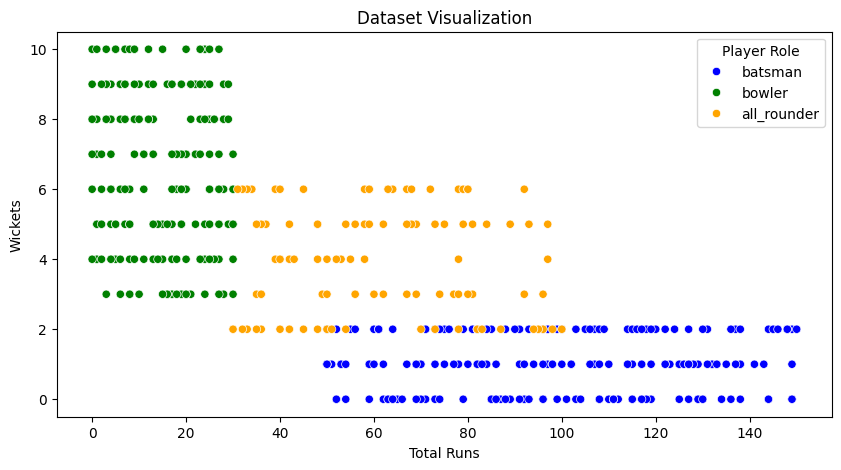

In [ ]:
# Map labels to colors
color_dict = {'batsman': 'blue', 'bowler': 'green', 'all_rounder': 'orange'}

# Create the plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='total_runs', y='wickets', data=df, hue='label', palette=color_dict)

# Adding titles and labels
plt.title('Dataset Visualization')
plt.xlabel('Total Runs')
plt.ylabel('Wickets')
plt.legend(title='Player Role')

# Show the plot
plt.show()


## **Step 3: Preprocess the Data**
You might need to encode the categorical variables. Here encoding refer string/words to some numerical representation. Since your dataset might already be in a suitable format, this step could be minimal:

In [ ]:
# Assuming df is your DataFrame
X = df[['total_runs', 'wickets']]  # Features: only total_runs and wickets
y = df['label']  # Target: label

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Step 4: Train the Random Forest Classifier**
Now, train the Random Forest Classifier using the training data:

In [ ]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## **Step 5: Evaluate the Model**
After training the model, evaluate its performance on the test set:

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

 all_rounder       0.91      0.88      0.89        24
     batsman       0.93      0.95      0.94        42
      bowler       1.00      1.00      1.00        34

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100



## **Step 6: Make Predictions**
You can now use the trained model to make predictions on new data:

In [ ]:
# Example: Predict the class for a new player based on runs and wickets
# Example: Predict the class for Lasith Malinga with 150 runs and 5 wickets
new_player_data = [[70, 4]]

# Predict the class
predicted_class = clf.predict(new_player_data)
print("Predicted Class:", predicted_class[0])


Predicted Class: all_rounder


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## **More Visulization**

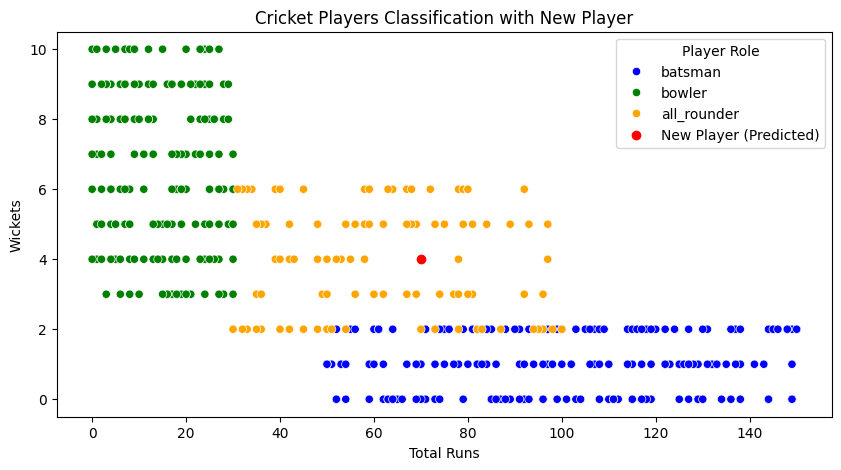

In [ ]:
# Map labels to colors
color_dict = {'batsman': 'blue', 'bowler': 'green', 'all_rounder': 'orange'}

# Create the plot for the existing dataset
plt.figure(figsize=(10, 5))
sns.scatterplot(x='total_runs', y='wickets', data=df, hue='label', palette=color_dict)

# Plot the new player's data
# 'new_player_data' is a list of lists, so we index into it with [0]
plt.scatter(new_player_data[0][0], new_player_data[0][1], color='red', label='New Player (Predicted)')

# Adding titles, labels, and legend
plt.title('Cricket Players Classification with New Player')
plt.xlabel('Total Runs')
plt.ylabel('Wickets')
plt.legend(title='Player Role')

# Show the plot
plt.show()
